## Willkommen im Hands-on zu Dataloadern und Neuronalen Netzen

Dieses Mal haben wir viel vor.Zur Vorbereitung gilt es, den SVHN-Datensatz aus StudIP herunterzuladen und zu entpacken. Die Labels sind in der Datei labels.csv enthalten. Hier ist jeweils die erste Spalte der Index der Bilddatei und die zweite Spalte das Label.

z.B: label=5 bei index=5, das ist die Bilddatei 5.jpg.




## Schritt 1: Dataset

Erzeuge eine von der Klasse Dataset abgeleitetes Klasse (aus torch.utils.data.Dataset) für diese Daten. 

Dieses soll die folgenden Funktionen implementieren:
- __init__(self): Einlesen der Labels / Vorbereiten der Datenstrukturen
- __len__(self): Gibt die Länge des Datensatzes zurück
- __getitem__(self,idx): Gibt das Datensatz-Item an Position idx zurück.

Achte darauf, dass die getitem-Funktion kein Image zurückliefern soll sondern einen torch.Tensor. Dafür kann es hilfreich sein die transforms aus torch.vision zu nutzen.
  



In [1]:
import torch
from torch.utils.data import Dataset
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

class SVHNDataset(Dataset):
    # Dein Code hier
    ...

ds = SVHNDataset()

Der folgende Block mit assert-Funktionen soll helfen, zu prüfen ob Du alles richtig gemacht hast.

In [ ]:
from neural_networks_test import test_aufgabe1
test_aufgabe1(locals())

## Schritt 2: Dataloader
Nimm das Dataset und erzeuge einen Dataloader mit batch_size 32 und zufälliger Reihenfolge der Samples dafür:

In [3]:
from torch.utils.data import DataLoader

data_loader = ...


In [ ]:
# Test für Aufgabe 2
from neural_networks_test import test_aufgabe2
test_aufgabe2(locals())

## Schritt 3: Wir bauen ein neuronales Netz

Ein neuronales Netz in pyTorch ist eine Klasse die vom Objekt nn.Module abgeleitet ist, ähnlich wie in diesem Beispiel aus der Vorlesung:

```
class TwoLayerPerceptron(nn.Module):
    def __init__(self):
        super(TwoLayerPerceptron, self).__init__()
        
        self.fc1 = nn.Linear(784, 32) 
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(32, 10) 
        self.sigmoid2 = nn.Sigmoid()


    def forward(self, x):
        # Linear function  # LINEAR
        out = self.sigmoid2(self.fc2(self.sigmoid1(self.fc1(x))))
        return out
```


Aufgabe: Baue ein neuronales Netz mit dem Klassennamen `MLP` mit 5 Schichten (inklusive Input und Output) und folgender Anzahl an hidden Neurons: 
- 1. Hidden Layer: 256
- 2. Hidden Layer: 128
- 3. Hidden Layer: 64

Verwende als Aktivierungsfunktion die Sigmoid-Funktion.


In [5]:
from torch import nn
class MLP(nn.Module):
    # Dein Code hier 
    ...

Nun wird das Modell instanziiert:

In [ ]:
model = MLP()

# Test für Aufgabe 3
from neural_networks_test import test_aufgabe3
test_aufgabe3(locals())


## Trainieren des Modells

Als letzten Schritt trainieren wir das eben erzeugte Modell. Das müssen wir erstmal vorbereiten:

1. Dafür müssen wir zunächst einen Optimizer definieren. Wir wählen hier Adam (optim.Adam) als Optimizer (den werden wir später noch behandeln) und eine Learning Rate von 10^-3 (1e-3).
2. Außerdem brauchen wir eine Loss-Funktion. Für multinomiale Klassifikation eignet sich CrossEntropy gut. 





In [7]:
from torch import optim

optimizer = ...
loss_function = ...


### Trainings-Loop

Jetzt bauen wir den Trainings-Loop. Dieser soll folgendes erledigen:

- Wir wollen 10 Epochen trainieren. Dafür benötigen wir einen entsprechenden for-loop.
- Wir ziehen die Bilder und Labels aus dem Dataloader:
- Wir setzen den Gradienten-Speicher mit zero_grad() im Optimizer auf 0.
- Wir machen einen Inference-Pass (Forward pass)
- Wir bestimmen die Loss-Funktion
- Wir machen die Backpropagation um die Gradienten des Loss zu bestimmen
- Wir aktualisieren die Gewichte (step() im optimizer)

Es ist außerdem hilfreich den Loss zu beobachten um zu sehen, ob dieser auch wirklich (wie gewünscht) sinkt. 



In [8]:

for epoch in range(10):
    # Dein Code hier
    ...

Epoch [1/10], Loss: 1.9621693014057442
Epoch [2/10], Loss: 1.9191461696895449
Epoch [3/10], Loss: 1.9085790037588262
Epoch [4/10], Loss: 1.8148384013030205
Epoch [5/10], Loss: 1.682384233027046
Epoch [6/10], Loss: 1.6157880353615273
Epoch [7/10], Loss: 1.5546496906395042
Epoch [8/10], Loss: 1.5013891050649002
Epoch [9/10], Loss: 1.4333007797403627
Epoch [10/10], Loss: 1.3846539777178952


Unten habe ich einmal Ergebnisse meines Trainings-Runs dargestellt. Wie wir sehen, ist da noch viel Luft nach oben:

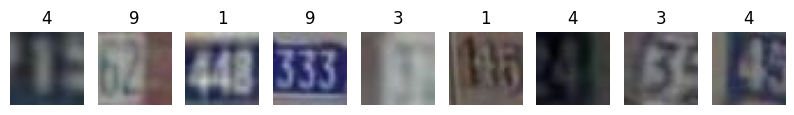

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
preds = model(images).argmax(1)
fig, ax = plt.subplots(1,len(images), figsize=(10,4))
for i,(image,pred) in enumerate(zip(images,preds)):
    ax[i].imshow(image.permute(1, 2, 0).cpu().numpy())
    ax[i].axis('off')
    ax[i].set_title(str(int(pred)))
